## Deutsch algorithm ##

The Deutsch algorithm addresses a problem that has no practical utility but effectively demonstrates the speedup achievable through quantum computation. The problem involves determining whether a function that maps one bit to another bit is constant or balanced.
\
Balanced:
$$f_1=\left \{ \begin{array}{rl}
0 \to 0\\
1 \to 1
\end{array}
\right. \quad
f_2=\left \{ \begin{array}{rl}
0 \to 1\\
1 \to 0
\end{array}
\right. $$
Constant:
$$
f_3=\left \{ \begin{array}{rl}
0 \to 0\\
1 \to 0
\end{array}
\right. \quad
f_4=\left \{ \begin{array}{rl}
0 \to 1\\
1 \to 1
\end{array}
\right. $$
Let us imagine there is an oracle that implements the function. Classically, we need to query it at least twice to determine whether the function is balanced or constant, whereas quantumly, a single query suffices. In general (according to the Deutsch-Jozsa algorithm), classically, in the worst case, $\frac{n}{2} + 1$ queries are required, whereas quantumly, only one query is necessary.
\
The algorithm involves applying various transformations to the initial state ($|x\rangle|y\rangle=|0\rangle |0\rangle$), applying the oracle, further transformations, and then measuring the qubits. If the first qubit is in the state $|0\rangle$ after measurement, the function is constant; if it is measured in the state $|1\rangle$, the function is balanced (we will see why).
\
The expression in braket notation for the application of the oracle is $|x,y\rangle \to |x,y \oplus f(x)\rangle $.
We can consider $y$ as an ancillary qubit for the computation; we are interested in $ x $ and $ f(x) $. Thus, by assigning $ y = 0 $, we obtain the state $ |x,f(x)\rangle $.\
To clarify further, let us consider some examples:
$$
|0,0\rangle\to|0,0\oplus f(0)\rangle\to|0,f(0)\rangle
$$
$$
|1,0\rangle\to|1,0\oplus f(1)\rangle\to|1,f(1)\rangle
$$
Where $\oplus$ is the sum mod 2.



We will implement all function cases in qiskit

In [1]:
#!pip install qiskit==0.42.0

In [2]:
#!pip install pylatexenc

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import numpy as np
import qiskit.quantum_info as qi
import qiskit
from qiskit import Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization.circuit import *
from qiskit import transpile, assemble
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter

In [4]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

##Constant 0

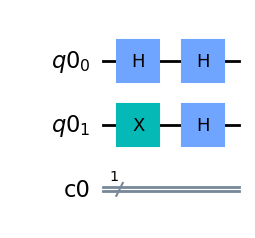

In [5]:
qr = QuantumRegister(2)
cr = ClassicalRegister(1)

circuit_const_0 = QuantumCircuit(qr,cr)

circuit_const_0.h(0)
circuit_const_0.x(1)
circuit_const_0.h(1)
# if we apply the idenity operator we will have always 0 as result
circuit_const_0.h(0)

circuit_const_0.draw(output='mpl')

In [6]:
# Load statevector simulator
simulator = Aer.get_backend("statevector_simulator")

In [7]:
# Create quatum job to execute
job = simulator.run(circuit_const_0)

# Execute the job
result = job.result()

state_ex=result.get_statevector(circuit_const_0)

In [8]:
state_ex.draw(output='latex') # Qubits are swapped in Qiskit

<IPython.core.display.Latex object>

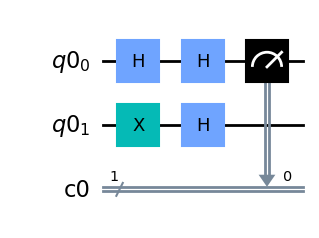

In [9]:
circuit_const_0.measure(0,0)
circuit_const_0.draw(output='mpl')

In [10]:
backend = Aer.get_backend("qasm_simulator")
shots = 1024 #1024 is the standard number of shots
job = execute(circuit_const_0, backend, shots = shots)
result = job.result()

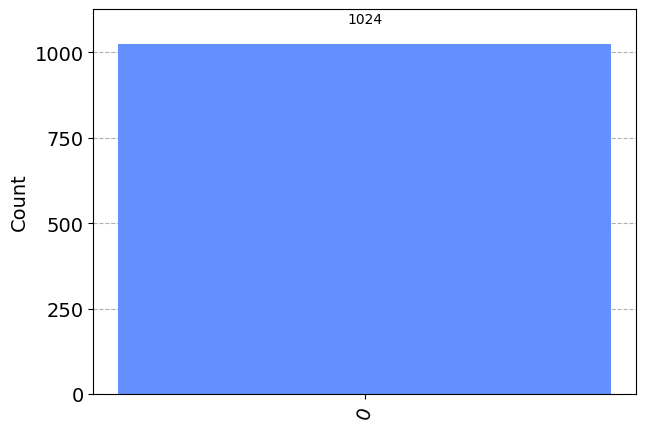

In [11]:
counts = result.get_counts()
plot_histogram(counts)

As we said previously, measuring 0 means that the function is constant

## Constant 1

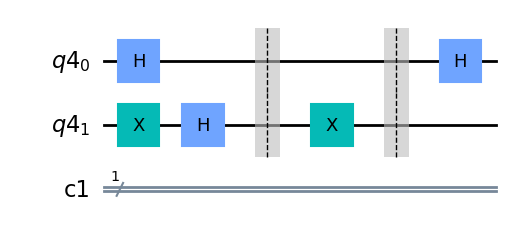

In [12]:
qr = QuantumRegister(2)
cr = ClassicalRegister(1)

circuit_const_1 = QuantumCircuit(qr,cr)

circuit_const_1.h(0)
circuit_const_1.x(1)
circuit_const_1.h(1)

circuit_const_1.barrier()
# if we apply the NOT gate to teh second qubit we will always have 1 as result
circuit_const_1.x(1)
circuit_const_1.barrier()

circuit_const_1.h(0)

circuit_const_1.draw(output='mpl')

In [13]:
# Create quatum job to execute
job = simulator.run(circuit_const_1)

# Execute the job
result = job.result()

state_ex=result.get_statevector(circuit_const_1)

In [14]:
state_ex.draw(output='latex') # Qubits are swapped in Qiskit

<IPython.core.display.Latex object>

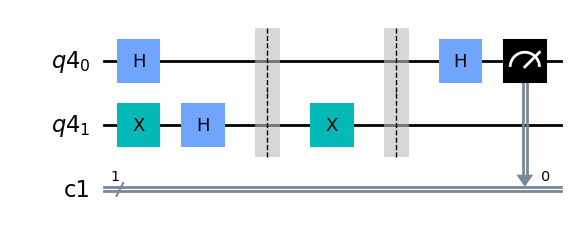

In [15]:
circuit_const_1.measure(0,0)
circuit_const_1.draw(output='mpl')

In [16]:
backend = Aer.get_backend("qasm_simulator")
shots = 1024 #1024 is the standard number of shots
job = execute(circuit_const_1, backend, shots = shots)
result = job.result()

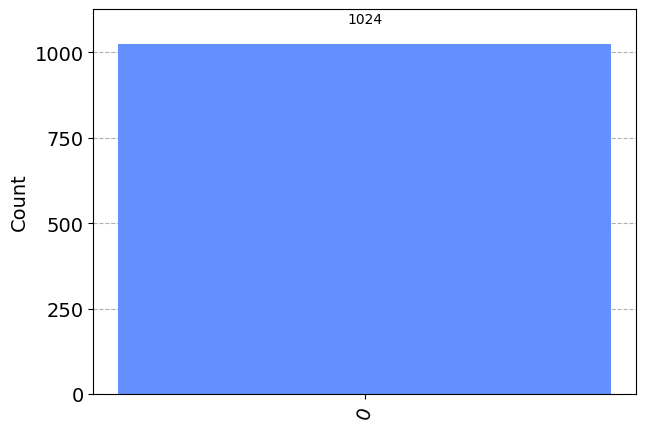

In [17]:
counts = result.get_counts()
plot_histogram(counts)

As we said previously, measuring 0 means that the function is constant

## Balanced

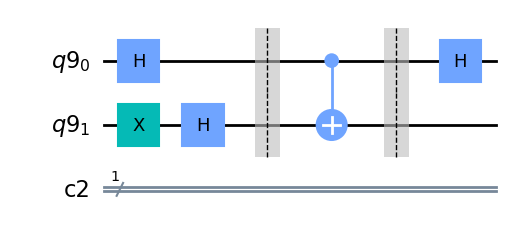

In [18]:
qr = QuantumRegister(2)
cr = ClassicalRegister(1)

circuit_balanced = QuantumCircuit(qr,cr)

circuit_balanced.h(0)
circuit_balanced.x(1)
circuit_balanced.h(1)

circuit_balanced.barrier()
# f returns always 0
circuit_balanced.cx(0,1)
circuit_balanced.barrier()

circuit_balanced.h(0)

circuit_balanced.draw(output='mpl')

In [19]:
# Create quatum job to execute
job = simulator.run(circuit_balanced)

# Execute the job
result = job.result()

state_ex=result.get_statevector(circuit_balanced)

In [20]:
state_ex.draw(output='latex') # Qubits are swapped in Qiskit

<IPython.core.display.Latex object>

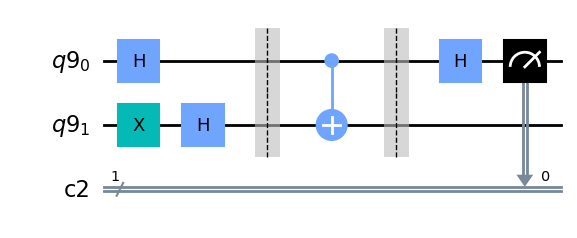

In [21]:
circuit_balanced.measure(0,0)
circuit_balanced.draw(output='mpl')

In [22]:
backend = Aer.get_backend("qasm_simulator")
shots = 1024 #1024 is the standard number of shots
job = execute(circuit_balanced, backend, shots = shots)
result = job.result()

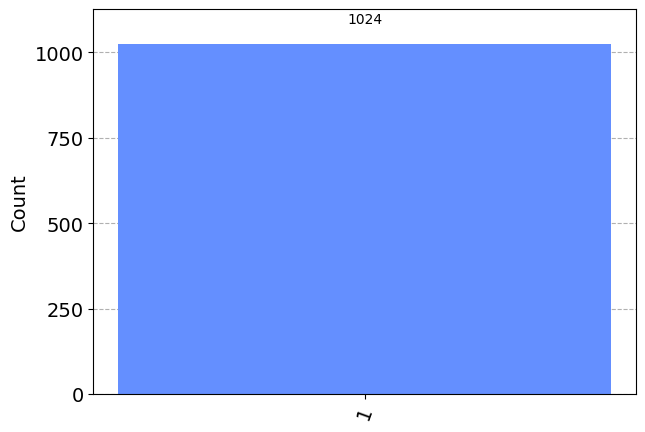

In [23]:
counts = result.get_counts()
plot_histogram(counts)

As we said previously, measuring 1 means that the function is balanced

Let's analize what happens in the algorithm:
$$
|0\rangle|0\rangle \to |0\rangle|1\rangle \to \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)=\frac{1}{2}(|0\rangle|0\rangle-|0\rangle|1\rangle+|1\rangle|0\rangle-|1\rangle|1\rangle)
$$
$$
\to (oracle) \to \frac{1}{2}(|0\rangle|f(0)\rangle-|0\rangle|\overline{f(0)}+|1\rangle|f(1)\rangle-|1\rangle|\overline{f(1)}\rangle)
$$
$$
\to \frac{1}{2\sqrt{2}}[(|0\rangle+|1\rangle)(|f(0)\rangle-|\overline{f(0)})+(|0\rangle-|1\rangle)(|f(1)\rangle-|\overline{f(1)})]
$$
$$
=\left \{ \begin{array}{rl}
|0\rangle \frac{|f(0)\rangle-|\overline f(0)\rangle}{\sqrt{2}} \to \text{if f is constant}\\
|1\rangle \frac{|f(0)\rangle-|\overline f(0)\rangle}{\sqrt{2}} \to \text{if f is balanced}
\end{array}
\right.
$$